In [1]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.random import set_seed

from kaggle_prediction_interval_birthweight.workflow.validation import Validator

np.random.seed(1)
set_seed(1)

In [3]:
def plot_result(obs, lower, upper, lower_new, upper_new):
    fig, ax = plt.subplots(1, 3, figsize=(10, 3))
    ax[0].vlines(x=obs, ymin=lower, ymax=upper, alpha=0.25)
    ax[0].set_xlim(
        np.min(np.concatenate([obs, lower])), np.max(np.concatenate([obs, upper]))
    )
    ax[0].set_ylim(
        np.min(np.concatenate([obs, lower])), np.max(np.concatenate([obs, upper]))
    )
    ax[0].plot([0, 1], [0, 1], transform=ax[0].transAxes, color="orange")
    ax[0].set_xlabel("observations")
    ax[0].set_ylabel("predictions")
    ax[1].hist(lower, bins=100, density=True, color="blue", alpha=0.75, label="train")
    ax[1].hist(
        lower_new, bins=100, density=True, color="orange", alpha=0.75, label="test"
    )
    ax[1].set_xlabel("predicted lower bounds")
    ax[1].legend()
    ax[2].hist(upper, bins=100, density=True, color="blue", alpha=0.75, label="train")
    ax[2].hist(
        upper_new, bins=100, density=True, color="orange", alpha=0.75, label="test"
    )
    ax[2].set_xlabel("predicted upper bounds")
    ax[2].legend()
    plt.show()

In [4]:
data = pd.read_csv("~/dev/data/kaggle-prediction-interval-birthweight/train.csv")
data_test = pd.read_csv("~/dev/data/kaggle-prediction-interval-birthweight/test.csv")

Validation on fold 1 of 2 begins.
Beginning warm-start.
Training warmed-up model.
1697/1697 [==============================] - 3s 2ms/step
Validation on fold 2 of 2 begins.
Beginning warm-start.
Training warmed-up model.
1681/1681 [==============================] - 2s 1ms/step
NOIS is 1459.2 and coverage is 48.6%.
178/178 [==============================] - 0s 2ms/step


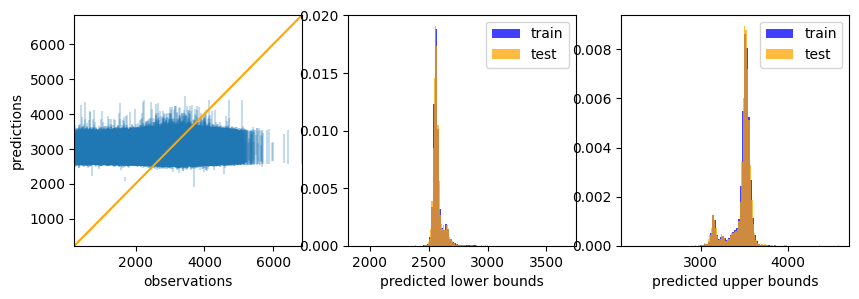

In [5]:
eim_validator = Validator("MissingnessNeuralNetEIM", n_epochs=2, units_list=[2])
eim_validator.fit(data)
eim_validator.print_performance_summary()

lower, upper = eim_validator.predict_intervals(data)
lower_new, upper_new = eim_validator.predict_intervals(data_test)

plot_result(data["DBWT"], lower, upper, lower_new, upper_new)